# Inverse Analysis of Turbidites by Machine Learning Technique

# まずデータの結合を行う

In [1]:
import numpy as np
import os
import ipdb

def connect_dataset(dist_start, dist_end, file_list, outputdir,
                    topodx=5, offset=5000,gclass_num=4,test_data_num=100):
    """
    複数のデータセットを連結する
    """
    #ipdb.set_trace()
    
    #学習領域の始点と終点を決めて，グリッド番号に変換する
    prox = np.round((dist_start+offset)/topodx).astype(np.int32)
    dist = np.round((dist_end+offset)/topodx).astype(np.int32)
    H = np.zeros([0,(dist-prox)* (gclass_num) ])
    icond = np.zeros([0,gclass_num + 3])
    
    #ファイルの読み込みと結合
    for i in range(len(file_list)):
        H_temp = np.loadtxt(file_list[i] + '/H1.txt', delimiter = ',')[:,prox:dist]
        for j in range(gclass_num - 1):
            H_next = np.loadtxt(file_list[i] + '/H{}.txt'.format(j + 1), delimiter = ',')[:,prox:dist]
            H_temp = np.concatenate([H_temp, H_next], axis = 1)
        icond_temp = np.loadtxt(file_list[i] + '/initial_conditions.txt', delimiter = ',')
        if icond_temp.shape[0] != H_temp.shape[0]:
            icond_temp = icond_temp[:-1,:]
        H = np.concatenate((H,H_temp),axis=0)
        icond = np.concatenate((icond,icond_temp),axis = 0)
    
    #データの最大値と最小値を取得する
    max_x = np.max(H)
    min_x = np.min(H)
    icond_max = np.max(icond, axis=0)
    icond_min = np.min(icond, axis=0)
    
    #データをテストとトレーニングに分割する
    H_train = H[0:-test_data_num,:]
    H_test = H[H.shape[0] - test_data_num:,:]
    icond_train = icond[0:-test_data_num,:]
    icond_test = icond[H.shape[0] - test_data_num:,:]
    
    #データを保存する
    if not os.path.exists(outputdir):
        os.mkdir(outputdir)
    np.savetxt(outputdir + '/H_train.txt',H_train,delimiter = ',')
    np.savetxt(outputdir + '/H_test.txt',H_test,delimiter = ',')
    np.savetxt(outputdir + '/icond_train.txt',icond_train,delimiter = ',')
    np.savetxt(outputdir + '/icond_test.txt',icond_test,delimiter = ',')
    np.savetxt(outputdir + '/icond_min.txt',icond_min,delimiter = ',')
    np.savetxt(outputdir + '/icond_max.txt',icond_max,delimiter = ',')
    np.savetxt(outputdir + '/x_minmax.txt',[min_x, max_x],delimiter = ',')
    
    
if __name__=="__main__":
    dist_start = 0
    dist_end = 28000
    original_data_dir = "Y:/naruse/TC_training_data_4"
    parent_dir = "Z:/Documents/PythonScripts/DeepLearningTurbidite/20180419"
    if not os.path.exists(parent_dir):
        os.mkdir(parent_dir)
    outputdir = parent_dir + "/data"
    file_list = []
    for i in range(1,17):
        file_list.append(original_data_dir + "/TCModel_for_ML{0:02d}/output".format(i))
    del file_list[2]
    connect_dataset(dist_start, dist_end, file_list, outputdir, test_data_num=200)
        
        
    

> <ipython-input-1-3bc448a3ebb8>(13)connect_dataset()
     12     #学習領域の始点と終点を決めて，グリッド番号に変換する
---> 13     prox = np.round((dist_start+offset)/topodx).astype(np.int32)
     14     dist = np.round((dist_end+offset)/topodx).astype(np.int32)

ipdb> c


# 次に機械学習を行う

Train on 2136 samples, validate on 534 samples
Epoch 1/4000
2136/2136 [==============================] - 5s 2ms/step - loss: 0.1997 - mean_squared_error: 0.1997 - val_loss: 0.0906 - val_mean_squared_error: 0.0906
Epoch 2/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0920 - mean_squared_error: 0.0920 - val_loss: 0.0736 - val_mean_squared_error: 0.0736
Epoch 3/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0740 - mean_squared_error: 0.0740 - val_loss: 0.0694 - val_mean_squared_error: 0.0694
Epoch 4/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0688 - mean_squared_error: 0.0688 - val_loss: 0.0661 - val_mean_squared_error: 0.0661
Epoch 5/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0656 - mean_squared_error: 0.0656 - val_loss: 0.0623 - val_mean_squared_error: 0.0623
Epoch 6/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0634 - mean_squared_error: 0.0634 - val_los

Epoch 50/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0423 - mean_squared_error: 0.0423 - val_loss: 0.0409 - val_mean_squared_error: 0.0409
Epoch 51/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0419 - mean_squared_error: 0.0419 - val_loss: 0.0413 - val_mean_squared_error: 0.0413
Epoch 52/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0418 - mean_squared_error: 0.0418 - val_loss: 0.0412 - val_mean_squared_error: 0.0412
Epoch 53/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0420 - mean_squared_error: 0.0420 - val_loss: 0.0418 - val_mean_squared_error: 0.0418
Epoch 54/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0420 - mean_squared_error: 0.0420 - val_loss: 0.0407 - val_mean_squared_error: 0.0407
Epoch 55/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0413 - mean_squared_error: 0.0413 - val_loss: 0.0418 - val_mean_squared_error: 0.041

2136/2136 [==============================] - 4s 2ms/step - loss: 0.0373 - mean_squared_error: 0.0373 - val_loss: 0.0375 - val_mean_squared_error: 0.0375
Epoch 100/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0372 - mean_squared_error: 0.0372 - val_loss: 0.0379 - val_mean_squared_error: 0.0379
Epoch 101/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0376 - mean_squared_error: 0.0376 - val_loss: 0.0369 - val_mean_squared_error: 0.0369
Epoch 102/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0372 - mean_squared_error: 0.0372 - val_loss: 0.0367 - val_mean_squared_error: 0.0367
Epoch 103/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0375 - mean_squared_error: 0.0375 - val_loss: 0.0373 - val_mean_squared_error: 0.0373
Epoch 104/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0371 - mean_squared_error: 0.0371 - val_loss: 0.0360 - val_mean_squared_error: 0.0360
Epoch 1

Epoch 148/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0347 - mean_squared_error: 0.0347 - val_loss: 0.0360 - val_mean_squared_error: 0.0360
Epoch 149/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0351 - mean_squared_error: 0.0351 - val_loss: 0.0351 - val_mean_squared_error: 0.0351
Epoch 150/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0348 - mean_squared_error: 0.0348 - val_loss: 0.0341 - val_mean_squared_error: 0.0341
Epoch 151/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0347 - mean_squared_error: 0.0347 - val_loss: 0.0341 - val_mean_squared_error: 0.0341
Epoch 152/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0349 - mean_squared_error: 0.0349 - val_loss: 0.0346 - val_mean_squared_error: 0.0346
Epoch 153/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0345 - mean_squared_error: 0.0345 - val_loss: 0.0349 - val_mean_squared_error:

Epoch 197/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0331 - mean_squared_error: 0.0331 - val_loss: 0.0326 - val_mean_squared_error: 0.0326
Epoch 198/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0332 - mean_squared_error: 0.0332 - val_loss: 0.0334 - val_mean_squared_error: 0.0334
Epoch 199/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0328 - mean_squared_error: 0.0328 - val_loss: 0.0329 - val_mean_squared_error: 0.0329
Epoch 200/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0327 - mean_squared_error: 0.0327 - val_loss: 0.0324 - val_mean_squared_error: 0.0324
Epoch 201/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0329 - mean_squared_error: 0.0329 - val_loss: 0.0328 - val_mean_squared_error: 0.0328
Epoch 202/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0333 - mean_squared_error: 0.0333 - val_loss: 0.0321 - val_mean_squared_error:

Epoch 246/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.0304 - val_mean_squared_error: 0.0304
Epoch 247/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.0312 - val_mean_squared_error: 0.0312
Epoch 248/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.0310 - val_mean_squared_error: 0.0310
Epoch 249/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.0305 - val_mean_squared_error: 0.0305
Epoch 250/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.0298 - val_mean_squared_error: 0.0298
Epoch 251/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.0312 - val_mean_squared_error:

Epoch 295/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.0283 - val_mean_squared_error: 0.0283
Epoch 296/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.0286 - val_mean_squared_error: 0.0286
Epoch 297/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.0293 - val_mean_squared_error: 0.0293
Epoch 298/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0301 - mean_squared_error: 0.0301 - val_loss: 0.0297 - val_mean_squared_error: 0.0297
Epoch 299/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.0295 - val_mean_squared_error: 0.0295
Epoch 300/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0297 - mean_squared_error: 0.0297 - val_loss: 0.0291 - val_mean_squared_error:

Epoch 344/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0284 - mean_squared_error: 0.0284 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 345/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0287 - mean_squared_error: 0.0287 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 346/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0287 - mean_squared_error: 0.0287 - val_loss: 0.0266 - val_mean_squared_error: 0.0266
Epoch 347/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0291 - mean_squared_error: 0.0291 - val_loss: 0.0266 - val_mean_squared_error: 0.0266
Epoch 348/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0285 - mean_squared_error: 0.0285 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 349/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0285 - mean_squared_error: 0.0285 - val_loss: 0.0270 - val_mean_squared_error:

Epoch 393/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0270 - mean_squared_error: 0.0270 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 394/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0276 - mean_squared_error: 0.0276 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 395/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0279 - mean_squared_error: 0.0279 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 396/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0271 - mean_squared_error: 0.0271 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 397/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0274 - mean_squared_error: 0.0274 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 398/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0270 - mean_squared_error: 0.0270 - val_loss: 0.0249 - val_mean_squared_error:

Epoch 442/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0258 - mean_squared_error: 0.0258 - val_loss: 0.0232 - val_mean_squared_error: 0.0232
Epoch 443/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0263 - mean_squared_error: 0.0263 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 444/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0265 - mean_squared_error: 0.0265 - val_loss: 0.0228 - val_mean_squared_error: 0.0228
Epoch 445/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0259 - mean_squared_error: 0.0259 - val_loss: 0.0231 - val_mean_squared_error: 0.0231
Epoch 446/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0266 - mean_squared_error: 0.0266 - val_loss: 0.0233 - val_mean_squared_error: 0.0233
Epoch 447/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0259 - mean_squared_error: 0.0259 - val_loss: 0.0236 - val_mean_squared_error:

Epoch 491/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.0223 - val_mean_squared_error: 0.0223
Epoch 492/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0255 - mean_squared_error: 0.0255 - val_loss: 0.0223 - val_mean_squared_error: 0.0223
Epoch 493/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0254 - mean_squared_error: 0.0254 - val_loss: 0.0226 - val_mean_squared_error: 0.0226
Epoch 494/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0252 - mean_squared_error: 0.0252 - val_loss: 0.0222 - val_mean_squared_error: 0.0222
Epoch 495/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0252 - mean_squared_error: 0.0252 - val_loss: 0.0215 - val_mean_squared_error: 0.0215
Epoch 496/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0256 - mean_squared_error: 0.0256 - val_loss: 0.0215 - val_mean_squared_error:

Epoch 540/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0243 - mean_squared_error: 0.0243 - val_loss: 0.0212 - val_mean_squared_error: 0.0212
Epoch 541/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.0207 - val_mean_squared_error: 0.0207
Epoch 542/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.0203 - val_mean_squared_error: 0.0203
Epoch 543/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0243 - mean_squared_error: 0.0243 - val_loss: 0.0205 - val_mean_squared_error: 0.0205
Epoch 544/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0244 - mean_squared_error: 0.0244 - val_loss: 0.0209 - val_mean_squared_error: 0.0209
Epoch 545/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 0.0208 - val_mean_squared_error:

Epoch 589/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0234 - mean_squared_error: 0.0234 - val_loss: 0.0192 - val_mean_squared_error: 0.0192
Epoch 590/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0200 - val_mean_squared_error: 0.0200
Epoch 591/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0195 - val_mean_squared_error: 0.0195
Epoch 592/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0239 - mean_squared_error: 0.0239 - val_loss: 0.0193 - val_mean_squared_error: 0.0193
Epoch 593/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0239 - mean_squared_error: 0.0239 - val_loss: 0.0198 - val_mean_squared_error: 0.0198
Epoch 594/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0194 - val_mean_squared_error:

Epoch 638/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0232 - mean_squared_error: 0.0232 - val_loss: 0.0190 - val_mean_squared_error: 0.0190
Epoch 639/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0230 - mean_squared_error: 0.0230 - val_loss: 0.0189 - val_mean_squared_error: 0.0189
Epoch 640/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0227 - mean_squared_error: 0.0227 - val_loss: 0.0186 - val_mean_squared_error: 0.0186
Epoch 641/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0230 - mean_squared_error: 0.0230 - val_loss: 0.0186 - val_mean_squared_error: 0.0186
Epoch 642/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.0186 - val_mean_squared_error: 0.0186
Epoch 643/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.0186 - val_mean_squared_error:

Epoch 687/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.0183 - val_mean_squared_error: 0.0183
Epoch 688/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0225 - mean_squared_error: 0.0225 - val_loss: 0.0177 - val_mean_squared_error: 0.0177
Epoch 689/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.0188 - val_mean_squared_error: 0.0188
Epoch 690/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0225 - mean_squared_error: 0.0225 - val_loss: 0.0177 - val_mean_squared_error: 0.0177
Epoch 691/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0222 - mean_squared_error: 0.0222 - val_loss: 0.0177 - val_mean_squared_error: 0.0177
Epoch 692/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.0177 - val_mean_squared_error:

Epoch 736/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0216 - mean_squared_error: 0.0216 - val_loss: 0.0171 - val_mean_squared_error: 0.0171
Epoch 737/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.0169 - val_mean_squared_error: 0.0169
Epoch 738/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0216 - mean_squared_error: 0.0216 - val_loss: 0.0174 - val_mean_squared_error: 0.0174
Epoch 739/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0216 - mean_squared_error: 0.0216 - val_loss: 0.0168 - val_mean_squared_error: 0.0168
Epoch 740/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 741/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.0172 - val_mean_squared_error:

Epoch 785/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0210 - mean_squared_error: 0.0210 - val_loss: 0.0166 - val_mean_squared_error: 0.0166
Epoch 786/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0210 - mean_squared_error: 0.0210 - val_loss: 0.0167 - val_mean_squared_error: 0.0167
Epoch 787/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0211 - mean_squared_error: 0.0211 - val_loss: 0.0166 - val_mean_squared_error: 0.0166
Epoch 788/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0213 - mean_squared_error: 0.0213 - val_loss: 0.0170 - val_mean_squared_error: 0.0170
Epoch 789/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0211 - mean_squared_error: 0.0211 - val_loss: 0.0166 - val_mean_squared_error: 0.0166
Epoch 790/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.0169 - val_mean_squared_error:

Epoch 834/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0206 - mean_squared_error: 0.0206 - val_loss: 0.0162 - val_mean_squared_error: 0.0162
Epoch 835/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0205 - mean_squared_error: 0.0205 - val_loss: 0.0158 - val_mean_squared_error: 0.0158
Epoch 836/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0203 - mean_squared_error: 0.0203 - val_loss: 0.0163 - val_mean_squared_error: 0.0163
Epoch 837/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0203 - mean_squared_error: 0.0203 - val_loss: 0.0158 - val_mean_squared_error: 0.0158
Epoch 838/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0205 - mean_squared_error: 0.0205 - val_loss: 0.0165 - val_mean_squared_error: 0.0165
Epoch 839/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0206 - mean_squared_error: 0.0206 - val_loss: 0.0160 - val_mean_squared_error:

Epoch 883/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0199 - mean_squared_error: 0.0199 - val_loss: 0.0158 - val_mean_squared_error: 0.0158
Epoch 884/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0199 - mean_squared_error: 0.0199 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 885/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0199 - mean_squared_error: 0.0199 - val_loss: 0.0154 - val_mean_squared_error: 0.0154
Epoch 886/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0199 - mean_squared_error: 0.0199 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 887/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0197 - mean_squared_error: 0.0197 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 888/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0202 - mean_squared_error: 0.0202 - val_loss: 0.0151 - val_mean_squared_error:

Epoch 932/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0194 - mean_squared_error: 0.0194 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 933/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0197 - mean_squared_error: 0.0197 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 934/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0195 - mean_squared_error: 0.0195 - val_loss: 0.0150 - val_mean_squared_error: 0.0150
Epoch 935/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0197 - mean_squared_error: 0.0197 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 936/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0194 - mean_squared_error: 0.0194 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 937/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0194 - mean_squared_error: 0.0194 - val_loss: 0.0148 - val_mean_squared_error:

Epoch 981/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0192 - mean_squared_error: 0.0192 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 982/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0192 - mean_squared_error: 0.0192 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 983/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0195 - mean_squared_error: 0.0195 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 984/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0193 - mean_squared_error: 0.0193 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 985/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0190 - mean_squared_error: 0.0190 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 986/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0192 - mean_squared_error: 0.0192 - val_loss: 0.0146 - val_mean_squared_error:

2136/2136 [==============================] - 4s 2ms/step - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 1078/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0185 - mean_squared_error: 0.0185 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 1079/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 1080/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 1081/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0185 - mean_squared_error: 0.0185 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 1082/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0186 - mean_squared_error: 0.0186 - val_loss: 0.0131 - val_mean_squared_error: 0.0131
Ep

2136/2136 [==============================] - 4s 2ms/step - loss: 0.0180 - mean_squared_error: 0.0180 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 1174/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0179 - mean_squared_error: 0.0179 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 1175/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0180 - mean_squared_error: 0.0180 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 1176/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0177 - mean_squared_error: 0.0177 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 1177/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0181 - mean_squared_error: 0.0181 - val_loss: 0.0125 - val_mean_squared_error: 0.0125
Epoch 1178/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0181 - mean_squared_error: 0.0181 - val_loss: 0.0127 - val_mean_squared_error: 0.0127
Ep

2136/2136 [==============================] - 4s 2ms/step - loss: 0.0170 - mean_squared_error: 0.0170 - val_loss: 0.0124 - val_mean_squared_error: 0.0124
Epoch 1270/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0171 - mean_squared_error: 0.0171 - val_loss: 0.0131 - val_mean_squared_error: 0.0131
Epoch 1271/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0171 - mean_squared_error: 0.0171 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 1272/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0171 - mean_squared_error: 0.0171 - val_loss: 0.0125 - val_mean_squared_error: 0.0125
Epoch 1273/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0167 - mean_squared_error: 0.0167 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 1274/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0170 - mean_squared_error: 0.0170 - val_loss: 0.0126 - val_mean_squared_error: 0.0126
Ep

2136/2136 [==============================] - 4s 2ms/step - loss: 0.0167 - mean_squared_error: 0.0167 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 1366/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0167 - mean_squared_error: 0.0167 - val_loss: 0.0123 - val_mean_squared_error: 0.0123
Epoch 1367/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 1368/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0165 - mean_squared_error: 0.0165 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 1369/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 1370/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0166 - mean_squared_error: 0.0166 - val_loss: 0.0126 - val_mean_squared_error: 0.0126
Ep

2136/2136 [==============================] - 4s 2ms/step - loss: 0.0165 - mean_squared_error: 0.0165 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 1462/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0162 - mean_squared_error: 0.0162 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 1463/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0163 - mean_squared_error: 0.0163 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 1464/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0166 - mean_squared_error: 0.0166 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 1465/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0161 - mean_squared_error: 0.0161 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 1466/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0164 - mean_squared_error: 0.0164 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Ep

2136/2136 [==============================] - 4s 2ms/step - loss: 0.0159 - mean_squared_error: 0.0159 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 1558/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0157 - mean_squared_error: 0.0157 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 1559/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0159 - mean_squared_error: 0.0159 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 1560/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0158 - mean_squared_error: 0.0158 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 1561/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0160 - mean_squared_error: 0.0160 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 1562/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0154 - mean_squared_error: 0.0154 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Ep

2136/2136 [==============================] - 4s 2ms/step - loss: 0.0152 - mean_squared_error: 0.0152 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 1654/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0153 - mean_squared_error: 0.0153 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 1655/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0154 - mean_squared_error: 0.0154 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 1656/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0150 - mean_squared_error: 0.0150 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 1657/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0154 - mean_squared_error: 0.0154 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 1658/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0154 - mean_squared_error: 0.0154 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Ep

2136/2136 [==============================] - 4s 2ms/step - loss: 0.0145 - mean_squared_error: 0.0145 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 1750/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0151 - mean_squared_error: 0.0151 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 1751/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0149 - mean_squared_error: 0.0149 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 1752/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0148 - mean_squared_error: 0.0148 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 1753/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0147 - mean_squared_error: 0.0147 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 1754/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0150 - mean_squared_error: 0.0150 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Ep

2136/2136 [==============================] - 4s 2ms/step - loss: 0.0145 - mean_squared_error: 0.0145 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 1846/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0147 - mean_squared_error: 0.0147 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 1847/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0146 - mean_squared_error: 0.0146 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 1848/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0145 - mean_squared_error: 0.0145 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 1849/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0147 - mean_squared_error: 0.0147 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 1850/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0144 - mean_squared_error: 0.0144 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Ep

2136/2136 [==============================] - 4s 2ms/step - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 1942/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 1943/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0141 - mean_squared_error: 0.0141 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 1944/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0142 - mean_squared_error: 0.0142 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 1945/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0139 - mean_squared_error: 0.0139 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 1946/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Ep

2136/2136 [==============================] - 4s 2ms/step - loss: 0.0139 - mean_squared_error: 0.0139 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 2038/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 2039/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch 2040/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0139 - mean_squared_error: 0.0139 - val_loss: 0.0083 - val_mean_squared_error: 0.0083
Epoch 2041/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0139 - mean_squared_error: 0.0139 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 2042/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0139 - mean_squared_error: 0.0139 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Ep

2136/2136 [==============================] - 4s 2ms/step - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch 2134/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 0.0085 - val_mean_squared_error: 0.0085
Epoch 2135/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.0083 - val_mean_squared_error: 0.0083
Epoch 2136/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 2137/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.0083 - val_mean_squared_error: 0.0083
Epoch 2138/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
Ep

2136/2136 [==============================] - 4s 2ms/step - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch 2230/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 2231/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0086 - val_mean_squared_error: 0.0086
Epoch 2232/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0083 - val_mean_squared_error: 0.0083
Epoch 2233/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
Epoch 2234/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.0085 - val_mean_squared_error: 0.0085
Ep

2136/2136 [==============================] - 4s 2ms/step - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch 2326/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.0078 - val_mean_squared_error: 0.0078
Epoch 2327/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
Epoch 2328/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0083 - val_mean_squared_error: 0.0083
Epoch 2329/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch 2330/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Ep

2136/2136 [==============================] - 4s 2ms/step - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 2422/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0078 - val_mean_squared_error: 0.0078
Epoch 2423/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 2424/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 2425/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 2426/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Ep

2136/2136 [==============================] - 4s 2ms/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0078 - val_mean_squared_error: 0.0078
Epoch 2518/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 2519/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 2520/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 2521/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 2522/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Ep

2136/2136 [==============================] - 4s 2ms/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 2614/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 2615/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 2616/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 2617/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 2618/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Ep

2136/2136 [==============================] - 4s 2ms/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 2710/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 2711/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 2712/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 2713/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 2714/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Ep

2136/2136 [==============================] - 4s 2ms/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 2806/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 2807/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 2808/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 2809/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 2810/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Ep

2136/2136 [==============================] - 4s 2ms/step - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 2902/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 2903/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 2904/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 2905/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 2906/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Ep

2136/2136 [==============================] - 4s 2ms/step - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 2998/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 2999/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 3000/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 3001/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 3002/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Ep

2136/2136 [==============================] - 4s 2ms/step - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0065 - val_mean_squared_error: 0.0065
Epoch 3094/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0065 - val_mean_squared_error: 0.0065
Epoch 3095/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0065 - val_mean_squared_error: 0.0065
Epoch 3096/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 3097/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 3098/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Ep

2136/2136 [==============================] - 4s 2ms/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0064 - val_mean_squared_error: 0.0064
Epoch 3190/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0063 - val_mean_squared_error: 0.0063
Epoch 3191/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 3192/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0062 - val_mean_squared_error: 0.0062
Epoch 3193/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0063 - val_mean_squared_error: 0.0063
Epoch 3194/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0063 - val_mean_squared_error: 0.0063
Ep

2136/2136 [==============================] - 4s 2ms/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0062 - val_mean_squared_error: 0.0062
Epoch 3286/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 3287/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0062 - val_mean_squared_error: 0.0062
Epoch 3288/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0062 - val_mean_squared_error: 0.0062
Epoch 3289/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0062 - val_mean_squared_error: 0.0062
Epoch 3290/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Ep

2136/2136 [==============================] - 4s 2ms/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0062 - val_mean_squared_error: 0.0062
Epoch 3382/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 3383/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 3384/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 3385/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 3386/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Ep

2136/2136 [==============================] - 4s 2ms/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 3478/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 3479/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0063 - val_mean_squared_error: 0.0063
Epoch 3480/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 3481/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 3482/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Ep

2136/2136 [==============================] - 4s 2ms/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 3574/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 3575/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 3576/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 3577/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 3578/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Ep

2136/2136 [==============================] - 4s 2ms/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 3670/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 3671/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 3672/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 3673/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 3674/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Ep

2136/2136 [==============================] - 4s 2ms/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 3766/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 3767/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 3768/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 3769/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 3770/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Ep

2136/2136 [==============================] - 4s 2ms/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch 3862/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch 3863/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 3864/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 3865/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch 3866/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Ep

2136/2136 [==============================] - 4s 2ms/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 3958/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 3959/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 3960/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 3961/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 3962/4000
2136/2136 [==============================] - 4s 2ms/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Ep

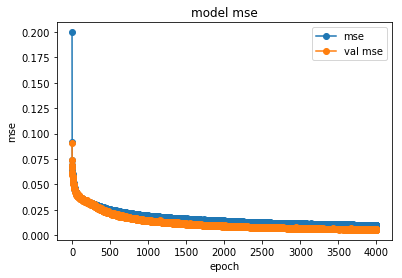

save the model


In [3]:
# -*- coding: utf-8 -*-
"""
Created on Tue Mar  7 15:43:18 2017

@author: hanar
"""

import time
import numpy as np
import os
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.optimizers import Adagrad
from keras.optimizers import Adadelta
from keras.optimizers import Adam
from keras.optimizers import Adamax
from keras.optimizers import Nadam
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.callbacks import TensorBoard
from keras.models import load_model
#from keras.utils.visualize_util import plot
import matplotlib.pyplot as plt
import keras.callbacks
import keras.backend.tensorflow_backend as KTF
import tensorflow as tf

#Global variables for normalizing parameters
max_x = 1.0
min_x = 0.0
max_y = 1.0
min_y = 0.0


def deep_learning_turbidite(resdir, X_train_raw, y_train_raw, X_test_raw, y_test_raw,
                            _lr=0.02, _decay=0,
                            _validation_split=0.2, _batch_size=32,
                            _momentum=0.9, _nesterov=True,
                            num_layers=4, dropout=0.5,
                            node_num = 2000,
                            _epochs=4000):
    """
    Creating the inversion model of turbidity currents by deep learning
    """
    #Normalizing dataset
    X_train = get_normalized_data(X_train_raw, min_x, max_x)
    X_test = get_normalized_data(X_test_raw, min_x, max_x)
    y_train = get_normalized_data(y_train_raw, min_y, max_y)
    y_test = get_normalized_data(y_test_raw, min_y, max_y)
    
    #ニューラルネットワークモデルの生成
    model = Sequential()
    model.add(Dense(node_num, input_dim=X_train.shape[1], activation='relu', kernel_initializer ='glorot_uniform'))#1st layer
    model.add(Dropout(dropout))
    for i in range(num_layers - 2):
        model.add(Dense(node_num, activation='relu', kernel_initializer ='glorot_uniform'))#2nd layer
        model.add(Dropout(dropout))
    model.add(Dense(y_train.shape[1], activation = 'relu', kernel_initializer ='glorot_uniform')) #last layer
    
    #モデルのコンパイル
    model.compile(loss="mean_squared_error", 
              optimizer=SGD(lr=_lr, decay=_decay, momentum=_momentum, nesterov=_nesterov),
              #optimizer=Adadelta(),
              metrics=["mean_squared_error"])    
    
    #学習を実行
    t = time.time()
    check = ModelCheckpoint("model2.hdf5")
    #es_cb = EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')
    #tb_cb = TensorBoard(log_dir=resdir, histogram_freq=2, write_graph=True, write_images=True)
    history = model.fit(X_train, y_train, epochs=_epochs, 
                    validation_split=_validation_split, batch_size=_batch_size,
                    callbacks=[check])
    
    #学習結果を評価
    loss_and_metrics = model.evaluate(X_test,y_test)
    print("\nloss:{} mse:{}".format(loss_and_metrics[0],loss_and_metrics[1]))
    
    print("Elapsed time: {:.1f} sec.".format(time.time()-t))
    
    #学習結果を可視化    
    #plot(model, to_file="model.png", show_shapes=True, show_layer_names=True)

    # modelに学習させた時の変化の様子をplot
    plot_history(history)
    
    return model, history

def apply_model(model, X, min_x, max_x, min_y, max_y):
    """
    モデルを適用する
    ノーマライズするためにXとYの最大値・最小値が必要
    """
    X_norm =  (X - min_x) / (max_x - min_x)
    Y_norm = model.predict(X_norm)
    Y = Y_norm*(max_y - min_y)+min_y
    return Y

def plot_history(history):
    # 精度の履歴をプロット
    plt.plot(history.history['mean_squared_error'],"o-",label="mse")
    plt.plot(history.history['val_mean_squared_error'],"o-",label="val mse")
    plt.title('model mse')
    plt.xlabel('epoch')
    plt.ylabel('mse')
    plt.legend(loc="upper right")
    plt.show()

#    # 損失の履歴をプロット
#    plt.plot(history.history['loss'],"o-",label="loss",)
#    plt.plot(history.history['val_loss'],"o-",label="val_loss")
#    plt.title('model loss')
#    plt.xlabel('epoch')
#    plt.ylabel('loss')
#    plt.legend(loc='upper right')
#    plt.show()

def test_model(model, x_test):
    #結果をテスト
    
    x_test_norm = get_normalized_data(x_test, min_x, max_x)
    test_result_norm = model.predict(x_test_norm)
    test_result = get_raw_data(test_result_norm, min_y, max_y)
    
    return test_result


def save_result(savedir, model, history, test_result):
    
    
    np.savetxt(savedir + 'test_result.txt',test_result,delimiter=',')
    np.savetxt(savedir+'loss.txt',history.history.get('loss'),delimiter=',')
    np.savetxt(savedir+'val_loss.txt',history.history.get('val_loss'),delimiter=',')
    
    #モデルをシリアライズして保存
    print('save the model')
    model.save(savedir + 'model2.hdf5')

def load_data(datadir):
    """
    This function load training and test data sets, and returns variables
    """
    global min_x, max_x, min_y, max_y
    
    x_train = np.loadtxt(datadir + 'H_train.txt',delimiter=',')
    x_test = np.loadtxt(datadir + 'H_test.txt',delimiter=',')
    y_train = np.loadtxt(datadir + 'icond_train.txt',delimiter=',')
    y_test = np.loadtxt(datadir + 'icond_test.txt',delimiter=',')
    min_y = np.loadtxt(datadir + 'icond_min.txt',delimiter=',')
    max_y = np.loadtxt(datadir + 'icond_max.txt',delimiter=',')
    [min_x, max_x] = np.loadtxt(datadir + 'x_minmax.txt',delimiter=',')
    
    return x_train, y_train, x_test, y_test

def set_minmax_data(_min_x, _max_x, _min_y, _max_y):
    global min_x, max_x, min_y, max_y
    
    min_x, max_x, min_y, max_y = _min_x, _max_x, _min_y, _max_y
    return
    


def get_normalized_data(x, min_val, max_val):
    """
    Normalizing the training and test dataset
    """
    x_norm = (x - min_val) / (max_val - min_val)
    
    return x_norm

def get_raw_data(x_norm, min_val, max_val):
    """
    Get raw data from the normalized dataset
    """
    x = x_norm * (max_val - min_val) + min_val
    
    return x

if __name__ == "__main__":
    
    #データの読み込み  
    datadir = '/home/naruse/Documents/Documents/PythonScripts/DeepLearningTurbidite/20180419/data/'
    resdir = '/home/naruse/Documents/Documents/PythonScripts/DeepLearningTurbidite/20180419/result2/'
    if not os.path.exists(resdir):
        os.mkdir(resdir)
    
    x_train, y_train, x_test, y_test = load_data(datadir)
    
    
    #学習の実行
    testcases = [2670]
    for i in range(len(testcases)):
        resdir_case = resdir + '{}/'.format(testcases[i])        
        if not os.path.exists(resdir_case):
            os.mkdir(resdir_case)
        x_train_sub = x_train[0:testcases[i],:]
        y_train_sub = y_train[0:testcases[i],:]
        model, history = deep_learning_turbidite(resdir_case, x_train_sub, y_train_sub, x_test, y_test, num_layers=5)
        #結果の検証と保存
        result = test_model(model, x_test)
        save_result(resdir_case,model,history,result)




# テスト結果を表示する

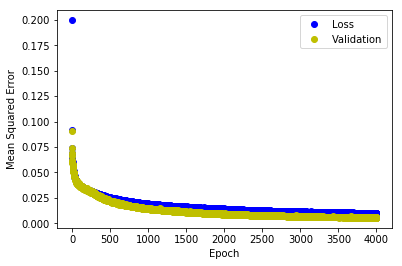

/home/naruse/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Century Gothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


<Figure size 432x288 with 0 Axes>

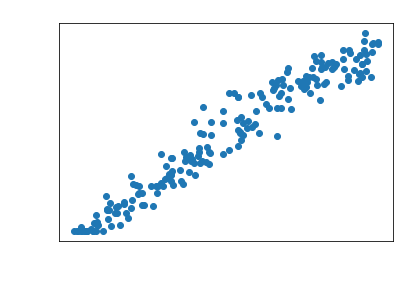

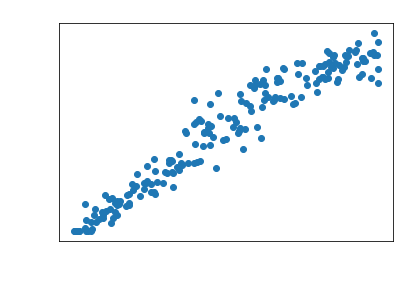

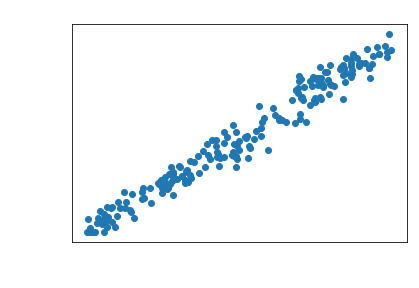

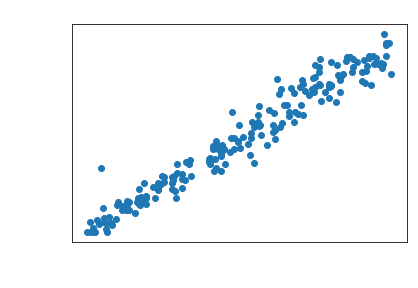

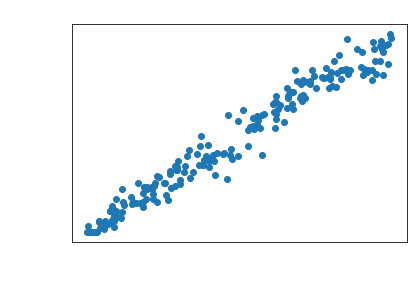

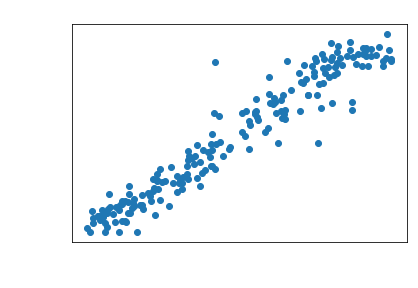

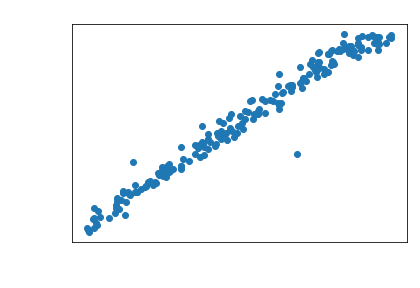

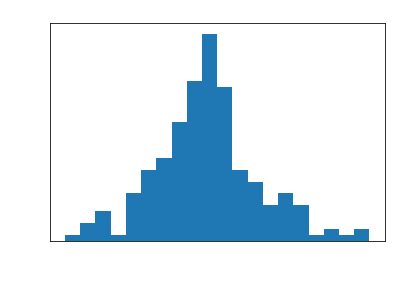

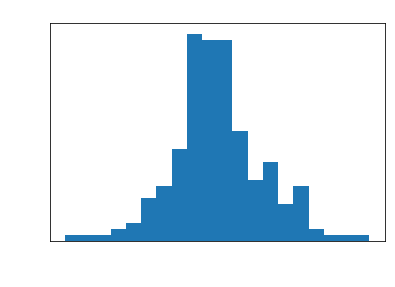

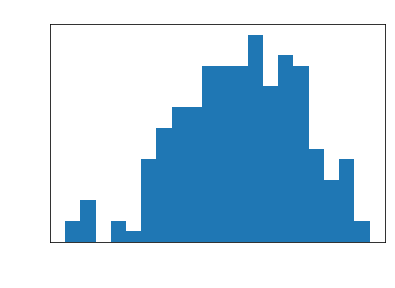

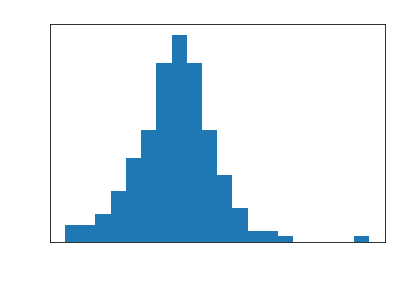

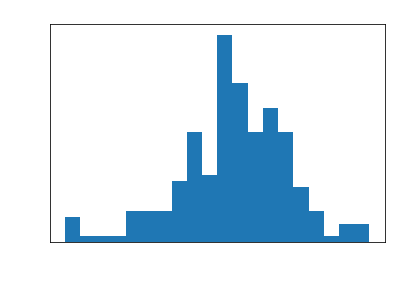

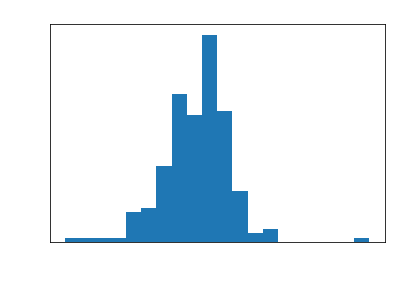

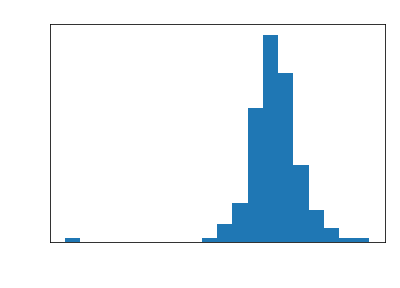

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

datadir = '/home/naruse/Documents/Documents/PythonScripts/DeepLearningTurbidite/20180419/data/'
resdir = '/home/naruse/Documents/Documents/PythonScripts/DeepLearningTurbidite/20180419/result2/2670/'

test_result = np.loadtxt(resdir + 'test_result.txt',delimiter=',')
icond = np.loadtxt(datadir + 'icond_test.txt',delimiter=',')
loss = np.loadtxt(resdir+'loss.txt',delimiter=',')
epoch = range(0,4000)
vloss = np.loadtxt(resdir+'val_loss.txt',delimiter=',')
resi = test_result - icond

fig = plt.figure()
plt.plot(epoch, loss, 'bo',label='Loss')
plt.plot(epoch, vloss, 'yo',label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend(loc="upper right")
plt.show()

fig2 = plt.figure()
hfont = {'fontname':'Century Gothic'}
textcol = 'w'
titlelabel = ['Initial Length', 'Initial Height', '$C_1$', '$C_2$', '$C_3$', '$C_4$', '$S_L$']
    
for i in range(len(titlelabel)):
    plt.figure()
    plt.plot(icond[:,i],test_result[:,i],"o")
    plt.xlabel('Original Value',color=textcol,size=14,**hfont)
    plt.ylabel('Estimated Value',color=textcol,size=14,**hfont)
    plt.title(titlelabel[i],color=textcol,size=14,**hfont)
    plt.tick_params(labelsize=14,colors=textcol)
    plt.savefig(titlelabel[i] + '.pdf')
    #plt.show()

for i in range(len(titlelabel)):
    plt.figure()
    plt.hist(resi[:,i],bins=20)
    plt.title(titlelabel[i],color=textcol,size=14,**hfont)
    plt.xlabel('Deviation from true value',color=textcol,size=14,**hfont)
    plt.ylabel('Frequency',color=textcol,size=14,**hfont)
    plt.tick_params(labelsize=14,colors=textcol)
    plt.savefig(titlelabel[i] + 'hist' + '.pdf')
    #plt.show()


# 重み係数の分布をみてみよう

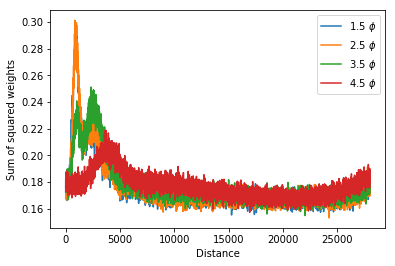

In [4]:
#%matplotlib
from keras.models import load_model

if 'model' in locals():
    model = model
else:
    model = load_model(resdir + 'model.hdf5')
        
gclass = 4
topodx = 5.0
w0 =model.layers[0].get_weights()
labels = ['1.5 $\phi$', '2.5 $\phi$', '3.5 $\phi$', '4.5 $\phi$']
num_node_per_gclass = int(w0[0].shape[0]/gclass)
x_node = np.arange(0,num_node_per_gclass*topodx,topodx)
for i in range(gclass):
    plt.plot(x_node,np.sum(w0[0]**2,axis=1)[num_node_per_gclass*i:num_node_per_gclass*(i+1)], label=labels[i])
plt.xlabel('Distance')
plt.ylabel('Sum of squared weights')
plt.legend()
plt.show()

# 残渣が正規分布を示すかどうか調べる

In [6]:
from scipy import stats
import numpy as np

print("残渣の平均値")
print(np.average(resi,axis=0))
print("残渣の2σ")
print(np.std(resi,axis=0)*2)
print()
print("p-values of the Shapiro-Wilk test for normality")
for i in range(resi.shape[1]):
    print(stats.shapiro(resi[:,i])[1])

残渣の平均値
[-2.23081845e+01 -1.06431702e+01 -4.48747192e-04 -3.54894532e-04
 -2.11616793e-04 -3.03822837e-04  3.80871468e-04]
残渣の2σ
[7.56951940e+01 8.45460161e+01 1.03880262e-03 1.21726357e-03
 1.11393650e-03 1.58674014e-03 9.02388308e-04]

p-values of the Shapiro-Wilk test for normality
0.03549334406852722
0.022830653935670853
0.04744340106844902
0.00026152131613343954
0.0028226617723703384
1.6449869235657388e-06
3.939684082437944e-12


# 入力値に誤差を与えた時の影響をチェックする

No handles with labels found to put in legend.


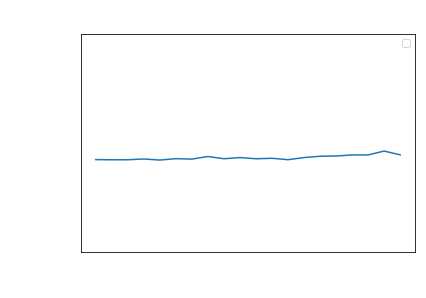

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from scipy import stats
%matplotlib inline

def check_noise(model,
                err_rate=0.10,
                datadir = '/home/naruse/Documents/Documents/PythonScripts/DeepLearningTurbidite/20180419/data/',
                resdir = '/home/naruse/Documents/Documents/PythonScripts/DeepLearningTurbidite/20180419/result2/2670/',
                gclass = 4,
                topodx = 5,
                plot_fig = True,
                ):

    #最初にノーマライズするための元データを取得する
    X_test = np.loadtxt(datadir + 'H_test.txt',delimiter=',')
    y_test = np.loadtxt(datadir + 'icond_test.txt',delimiter=',')
    y_min = np.loadtxt(datadir + 'icond_min.txt',delimiter=',')
    y_max = np.loadtxt(datadir + 'icond_max.txt',delimiter=',')

    
    #入力データを[0,1]に正規化する
    min_x, max_x = np.loadtxt(datadir + 'x_minmax.txt',delimiter=',')
    X_test_norm =  (X_test - min_x) / (max_x - min_x)

    #誤差を与える
    #err_rate = 0.10 #誤差の2σが計測値の値×err_rateとなるようにする
    err = np.random.normal(size=X_test_norm.shape)
    x_test_norm_w_error = X_test_norm + err * 0.5 * err_rate * X_test_norm
    num_node_per_gclass = int(X_test_norm.shape[1] / gclass)
    dist = np.arange(0,num_node_per_gclass)* topodx
    

    #print(X_test_norm[1,1000:1010])
    #print(x_test_norm_w_error[1,1000:1010])
    #print(err[1,1000:1010])

    #モデルをロードする
    #model = load_model(resdir+'model.hdf5')
    test_result = model.predict(X_test_norm)
    test_result = test_result * (y_max - y_min) + y_min
    test_result_w_error = model.predict(x_test_norm_w_error)
    test_result_w_error = test_result_w_error * (y_max - y_min) + y_min

    #基本
    icond = np.loadtxt(datadir + 'icond_test.txt',delimiter=',')
    loss = np.loadtxt(resdir+'loss.txt',delimiter=',')
    epoch = range(0,len(loss))
    vloss = np.loadtxt(resdir+'val_loss.txt',delimiter=',')
    resi = test_result - icond
    resi_w_error = test_result_w_error - icond

    #図を描画
    if plot_fig:
        plt.figure()
        plt.plot(x_test_norm_w_error[1,0:num_node_per_gclass], label='With Error')
        plt.plot(X_test_norm[1,0:num_node_per_gclass], label='Original')
        plt.xlabel('Distance')
        plt.ylabel('Normalized thickness')
        plt.legend()

    
        titlelabel = ['Initial Length', 'Initial Height', '$C_1$', '$C_2$', '$C_3$', '$C_4$', '$S_1$']
        hfont = {'fontname':'Century Gothic'}
        textcol = 'w'
    
        for i in range(len(titlelabel)):
            plt.figure()
            plt.plot(icond[:,i],test_result[:,i],"bo",label='without error')
            plt.plot(icond[:,i],test_result_w_error[:,i],"ro",label='with error ({:.0f}%)'.format(err_rate*100))
            plt.title(titlelabel[i],color=textcol,size=14,**hfont)
            plt.xlabel('True values',color=textcol,size=14,**hfont)
            plt.ylabel('Estimated values',color=textcol,size=14,**hfont)
            plt.legend()
            plt.tick_params(labelsize=14,colors=textcol)
            plt.savefig(titlelabel[i] + 'err{:.0f}'.format(err_rate*100) + '.pdf')
            #plt.show()

        for i in range(len(titlelabel)):
            plt.figure()
            plt.hist(resi_w_error[:,i],bins=20)
            plt.title(titlelabel[i])
            plt.xlabel('Deviation from true value')
            plt.ylabel('Frequency')
            #plt.show()

        print("残渣平均二乗和")
        print(np.average(resi**2,axis=0))
        print("残渣平均二乗和（誤差付き）")
        print(np.average(resi_w_error**2,axis=0))
        print("残渣の平均値")
        print(np.average(resi,axis=0))
        print("残渣の平均値（誤差付き）")
        print(np.average(resi_w_error,axis=0))
        print("残渣の2σ")
        print(np.std(resi,axis=0)*2)
        print("残渣の2σ（誤差付き）")
        print(np.std(resi_w_error,axis=0)*2)
        print("真値に対する残渣の割合")
        print(np.average(np.abs(resi)/icond,axis=0))
        print("真値に対する残渣の割合（誤差付き）")
        print(np.average(np.abs(resi_w_error)/icond,axis=0))
        print("p-values of the Shapiro-Wilk test for normality")
        for i in range(resi.shape[1]):
            print(stats.shapiro(resi[:,i])[1])
            print("p-values of the Shapiro-Wilk test for normality (with error)")
        for i in range(resi_w_error.shape[1]):
            print(stats.shapiro(resi_w_error[:,i])[1])
    
    #結果を戻り値として返す
    return np.sqrt(np.average(resi_w_error**2,axis=0))

if __name__ == "__main__":
    datadir = '/home/naruse/Documents/Documents/PythonScripts/DeepLearningTurbidite/20180419/data/'
    resdir = '/home/naruse/Documents/Documents/PythonScripts/DeepLearningTurbidite/20180419/result/2670/'
    model = load_model(resdir+'model.hdf5')
    
    test_err_rate = np.linspace(0,1.0,20)
    result = np.zeros([len(test_err_rate),7])
    num_tests = 5
    for i in range(len(test_err_rate)):
        testres = np.zeros([num_tests,7])
        for j in range(num_tests):
            testres[j,:] = check_noise(model,err_rate=test_err_rate[i],plot_fig=False)
        result[i,:] = np.average(testres,axis=0)
    
    np.savetxt("result_w_error.csv",result,delimiter=',')
    
    hfont = {'fontname':'Sans'}
    textcol = 'w'   
    plt.plot(test_err_rate*100,result[:,6])
    plt.title("$S_L$",color=textcol,size=14,**hfont)
    plt.xlabel('Ratio of random noise (%)',color=textcol,size=14,**hfont)
    plt.ylabel('Standard Deviation of Estimation Error',color=textcol,size=14,**hfont)
    plt.ylim(0.0003,0.001)
    plt.legend()
    plt.tick_params(labelsize=14,colors=textcol)
    plt.savefig("error_rate_test.svg")
    plt.show()
        
        

# 入力データにリサンプリングをして逆解析結果への影響を調べる

No handles with labels found to put in legend.
/home/naruse/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


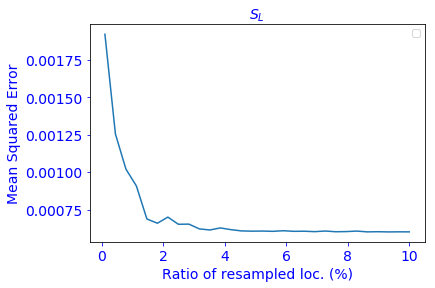

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from scipy import stats
from scipy.interpolate import interp1d 
%matplotlib inline

def check_interp(model,
                 frac = 0.005,
                datadir = 'Z:/Documents/PythonScripts/DeepLearningTurbidite/20180419/data/',
                resdir = 'Z:/Documents/PythonScripts/DeepLearningTurbidite/20180419/result/2670/',
                 plot_fig = True,
                ):

    #最初にノーマライズするための元データを取得する
    X_test = np.loadtxt(datadir + 'H_test.txt',delimiter=',')
    y_test = np.loadtxt(datadir + 'icond_test.txt',delimiter=',')
    y_min = np.loadtxt(datadir + 'icond_min.txt',delimiter=',')
    y_max = np.loadtxt(datadir + 'icond_max.txt',delimiter=',')

    #入力データを[0,1]に正規化するための値を取得する
    min_x, max_x = np.loadtxt(datadir + 'x_minmax.txt',delimiter=',')
    X_test_norm =  (X_test - min_x) / (max_x - min_x)

    #テストデータをサブサンプリングする
    #frac = 0.005 #元データからどれだけの割合をサンプリングするか
    gclass = 4 #粒度階の数
    coord_num = X_test_norm.shape[1] / gclass #グリッド数
    sam_coord_num = np.round(frac * coord_num) #サンプルのグリッド数
    x_coord = np.arange(X_test_norm.shape[1]/ gclass) #0から7000までのインデックス番号
    sampleid = np.sort(np.random.choice(x_coord,int(sam_coord_num),replace=False)) #取り出す座標番号

    thick_interp = np.zeros(X_test.shape) #補完されたサンプル厚さデータ
    for j in range(gclass):
        sid = sampleid + coord_num * j
        #print(sid)
        sindex = sid.astype(np.int32)
        f = interp1d(sid,X_test_norm[:,sindex], kind="linear", fill_value='extrapolate') #j番目の粒度階の補間関数
        coord_range = np.arange(coord_num*j, coord_num*(j+1)) #補間する範囲
        thick_interp[:,coord_range.astype(np.int32)] = f(coord_range) #補完したデータ


    #モデルをロードする
    #print(X_test_norm.shape)
    #print(thick_interp.shape)
    #model = load_model(resdir+'model.hdf5')
    test_result = model.predict(X_test_norm)
    test_result = test_result * (y_max - y_min) + y_min
    test_result_sample = model.predict(thick_interp)
    test_result_sample = test_result_sample * (y_max - y_min) + y_min

    #基本
    icond = np.loadtxt(datadir + 'icond_test.txt',delimiter=',')
    resi = test_result - icond
    resi_sample = test_result_sample - icond

    #予測のずれの比較
    titlelabel = ['Initial Length', 'Initial Height', '$C_1$', '$C_2$', '$C_3$', '$C_4$','$S_1$']
    hfont = {'fontname':'Century Gothic'}
    textcol = 'w'
    
    if plot_fig:
        for i in range(len(titlelabel)):
            plt.figure()
            plt.plot(icond[:,i],test_result[:,i],"bo",label='Original')
            plt.plot(icond[:,i],test_result_sample[:,i],"ro",label='Resampled data ({:.1f}%)'.format(frac*100))
            plt.title(titlelabel[i],color=textcol,size=14,**hfont)
            plt.xlabel('True values',color=textcol,size=14,**hfont)
            plt.ylabel('Estimated values',color=textcol,size=14,**hfont)
            plt.legend()
            plt.tick_params(labelsize=14,colors=textcol)
            plt.savefig(titlelabel[i] + 'resample{:.1f})'.format(frac*100) + '.pdf')
            plt.show()

        for i in range(len(titlelabel)):
            plt.figure()
            plt.hist(resi_sample[:,i],bins=20)
            plt.title(titlelabel[i])
            plt.xlabel('Deviation from true value')
            plt.ylabel('Frequency')
            plt.show()

        print("残渣の平均値")
        print(np.average(resi,axis=0))
        print("残渣の平均値（誤差付き）")
        print(np.average(resi_sample,axis=0))
        print("残渣の2σ")
        print(np.std(resi,axis=0)*2)
        print("残渣の2σ（誤差付き）")
        print(np.std(resi_sample,axis=0)*2)
        print()
        print("p-values of the Shapiro-Wilk test for normality")
        for i in range(resi.shape[1]):
            print(stats.shapiro(resi[:,i])[1])
        print("p-values of the Shapiro-Wilk test for normality (with error)")
        for i in range(resi_sample.shape[1]):
            print(stats.shapiro(resi_sample[:,i])[1])
    
    #結果を戻り値として返す
    return np.sqrt(np.average(resi_sample**2,axis=0))

if __name__ == "__main__":
    _datadir = '/home/naruse/Documents/Documents/PythonScripts/DeepLearningTurbidite/20180419/data/'
    _resdir = '/home/naruse/Documents/Documents/PythonScripts/DeepLearningTurbidite/20180419/result2/2670/'
    model = load_model(resdir+'model.hdf5')
    
    test_err_rate = np.linspace(0.1,0.001,30)
    result = np.zeros([len(test_err_rate),7])
    num_tests = 10
    for i in range(len(test_err_rate)):
        testres = np.zeros([num_tests,7])
        for j in range(num_tests):
            testres[j,:] = check_interp(model, datadir=_datadir, resdir=_resdir, frac=test_err_rate[i], plot_fig=False)
        result[i,:] = np.average(testres,axis=0)

    hfont = {'fontname':'Helvetica'}
    textcol = 'b'   
    plt.plot(test_err_rate*100,result[:,6])
    plt.title("$S_L$",color=textcol,size=14,**hfont)
    plt.xlabel('Ratio of resampled loc. (%)',color=textcol,size=14,**hfont)
    plt.ylabel('Mean Squared Error',color=textcol,size=14,**hfont)
    plt.legend()
    plt.tick_params(labelsize=14,colors=textcol)
    plt.savefig("mabiki.svg")
    plt.show()
        

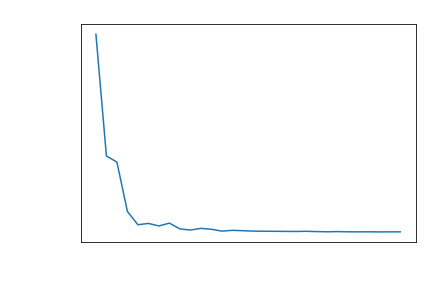

In [4]:
    textcol = 'w'   
    plt.plot(test_err_rate*100,result[:,6])
    plt.title("$S_L$",color=textcol,size=14,**hfont)
    plt.xlabel('Ratio of resampled loc. (%)',color=textcol,size=14,**hfont)
    plt.ylabel('Mean Squared Error',color=textcol,size=14,**hfont)
    plt.legend()
    plt.tick_params(labelsize=14,colors=textcol)
    plt.savefig("mabiki.svg")
    plt.show()


## 推定結果のズレが計算結果へどの程度影響するかをチェックする

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib

original_dir = 'Z:/Documents/MATLAB/TCtrainData_forML/TCModel_for_MLTEST/test_output_original2/'
estimated_dir = 'Z:/Documents/MATLAB/TCtrainData_forML/TCModel_for_MLTEST/test_output_reconst2/'
dist_offset = 5000.
dist_max = 28000.
topodx = 5
grid_origin = int(dist_offset / topodx)
grid_end = int((dist_max + dist_offset)/topodx)
snapshot_time = 5000.
time_interval = 200.
time_frame = int(snapshot_time / time_interval)

icond_estimated = np.loadtxt(estimated_dir + 'icond.txt',delimiter=',')
Ht_estimated = np.loadtxt(estimated_dir + 'Ht.txt',delimiter=',')
Ct_estimated = np.loadtxt(estimated_dir + 'Ct.txt',delimiter=',')
U_estimated = np.loadtxt(estimated_dir + 'U.txt',delimiter=',')
x_estimated = np.loadtxt(estimated_dir + 'x.txt',delimiter=',')
x_bed = np.loadtxt(estimated_dir + 'x_init.txt',delimiter=',')

icond_original = np.loadtxt(original_dir + 'icond.txt',delimiter=',')
Ht_original = np.loadtxt(original_dir + 'Ht.txt',delimiter=',')
Ct_original = np.loadtxt(original_dir + 'Ct.txt',delimiter=',')
U_original = np.loadtxt(original_dir + 'U.txt',delimiter=',')
x_original = np.loadtxt(original_dir + 'x.txt',delimiter=',')


print(icond_estimated)
print(icond_original)
print(icond_estimated - icond_original)

plt.figure(num=None, figsize=(16, 4), facecolor='w', edgecolor='g')
hfont = {'fontname':'Century Gothic'}
plt.subplots_adjust(bottom=0.15, wspace=0.4)

plt.subplot(1,3,1)
plt.plot(x_estimated[time_frame,:], U_estimated[time_frame,:],'r--', label='Estimated')
plt.plot(x_original[time_frame,:], U_original[time_frame,:],'b', label='Original')
plt.title('Flow Velocity', size=21,**hfont)
plt.xlabel('Distance (m)', size = 18, **hfont)
plt.ylabel('Velocity (m/s)', size = 18, **hfont)
plt.legend(fontsize=14)

plt.subplot(1,3,2)
plt.plot(x_estimated[time_frame,:], Ct_estimated[time_frame,:] * 100,'r--', label='Estimated')
plt.plot(x_original[time_frame,:], Ct_original[time_frame,:] * 100,'b', label='Original')
plt.title('Total Concentration', size = 21, **hfont)
plt.xlabel('Distance (m)', size = 18, **hfont)
plt.ylabel('Concentration (%)', size = 18, **hfont)
plt.legend(fontsize=14)

plt.subplot(1,3,3)
plt.plot(x_bed[grid_origin:grid_end], Ht_estimated[-1,grid_origin:grid_end],'r--', label='Estimated')
plt.plot(x_bed[grid_origin:grid_end], Ht_original[-1,grid_origin:grid_end],'b', label='Original')
plt.title('Bed thickness', size = 21, **hfont)
plt.xlabel('Distance (m)', size = 18, **hfont)
plt.ylabel('Thickness (m)', size = 18, **hfont)
plt.legend(fontsize=14)

plt.show()


Using matplotlib backend: Qt5Agg
[  1.58653237e+02   1.78885663e+02   1.48600251e-03   9.66777333e-03
   1.33253620e-03   3.12654629e-03   6.38495207e-03]
[  1.73280000e+02   1.78630000e+02   8.65760000e-03   6.47660000e-03
   8.39360000e-03   8.19620000e-03   9.14300000e-04]
[ -1.46267631e+01   2.55662556e-01  -7.17159749e-03   3.19117333e-03
  -7.06106380e-03  -5.06965371e-03   5.47065207e-03]


## 露頭データの解析

   distance   Loc    1.5phi    2.5phi    3.5phi    4.5phi
0   6005.01  Loc1  0.001029  0.012657  0.008567  0.016747
1   7173.01  Loc2  0.004659  0.089863  0.062370  0.123908
2   8399.01  Loc3  0.023473  0.056191  0.042285  0.065251
3  12726.01  Loc4  0.075649  0.095340  0.055783  0.093027
4  17249.01  Loc5  0.246986  0.101101  0.023681  0.119632
5  27785.01  Loc6  0.002041  0.075939  0.125248  0.085372
[[3.53910711e+02 5.33661047e+02 4.23848660e-03 2.87399078e-03
  3.08278962e-03 1.00840000e-04 7.13125839e-03]]


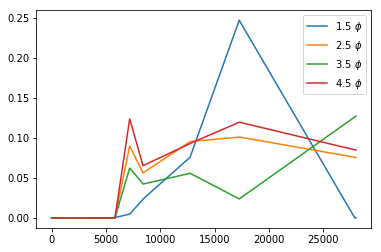

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from scipy import stats
from scipy.interpolate import interp1d 
import pandas as pd
from pykrige import OrdinaryKriging as OK


datadir = '/home/naruse/Documents/Documents/PythonScripts/DeepLearningTurbidite/20180419/data/'
resdir = '/home/naruse/Documents/Documents/PythonScripts/DeepLearningTurbidite/20180419/result2/2670/'

#datadir = 'Z:/Documents/PythonScripts/DeepLearningTurbidite/20180221/data/'
#resdir = 'Z:/Documents/PythonScripts/DeepLearningTurbidite/20180221/result/2558/'


#最初にノーマライズするための元データを取得する
#X_train = np.loadtxt(datadir + 'H_train.txt',delimiter=',')
#X_test = np.loadtxt(datadir + 'H_test.txt',delimiter=',')
#y_train = np.loadtxt(datadir + 'icond_train.txt',delimiter=',')
#y_test = np.loadtxt(datadir + 'icond_test.txt',delimiter=',')


#初期設定
if not "model" in locals(): 
    model = load_model(resdir+'model.hdf5')
#gclass = 3
#gclass_label = ["500 $\mu$m","125 $\mu$m","63 $\mu$m"]
gclass = 4
gclass_label = ["1.5 $\phi$","2.5 $\phi$","3.5 $\phi$", "4.5 $\phi$"]
topodx = 5.
coord_num = int(model.layers[0].input_shape[1]/gclass)

#入力データを[0,1]に正規化するための値を取得する
min_x, max_x = np.loadtxt(datadir + 'x_minmax.txt',delimiter=',')
y_min = np.loadtxt(datadir + 'icond_min.txt',delimiter=',')
y_max = np.loadtxt(datadir + 'icond_max.txt',delimiter=',')

#露頭データを読み込む
#dist_max = 22000. #学習データにおける末端の距離
outcrop = pd.read_csv('../DeepLearningTurbidite_Fukuda/otadai_no5.csv')
#outcrop = pd.read_csv('../DeepLearningTurbidite_Fukuda/GA_naruse_v2.csv')
#outcrop = outcrop.append(pd.DataFrame([[0,'Loc0',0,0,0],[dist_max,'LocE',0,0,0]], columns=outcrop.columns))
outcrop = outcrop.sort_values('distance')
#outcrop['distance'] = outcrop['distance'] - 6005.01
outcrop['distance'] = outcrop['distance'] - 0
#outcrop = outcrop.append(pd.DataFrame([[0,'Loc0',0,0,0,0]], columns=outcrop.columns))
print(outcrop)

#補間の下準備
thick_interp = np.zeros([1,coord_num*gclass])#補間されたサンプル厚さデータ
outcrop_x_id = np.round(outcrop['distance']/topodx).astype(np.int32) #逆解析システムでのサンプリング地点のindex番号
x = np.arange(0,coord_num*topodx,topodx)

#データの補完を行う
#vparams = np.array([[0.035, 10000., 0.001],[0.006, 10000., 0.002],[0.005, 10000., 0.002],[0.035, 10000., 0.001]])
for j in range(gclass):
    f = interp1d(outcrop['distance'],outcrop.iloc[:,j+2], kind="linear", fill_value='extrapolate') #j番目の粒度階の補間関数
    thick_interp[0,coord_num*j:coord_num*(j+1)] = f(x) #補完したデータ
    
    #Kriging による補間
    #okip = OK(outcrop['distance'],np.zeros(outcrop['distance'].shape),outcrop.iloc[:,j+2],variogram_model='power',variogram_parameters=vparams[j,:],)
    #okip = OK(outcrop['distance'],np.zeros(outcrop['distance'].shape),outcrop.iloc[:,j+2],variogram_model='power',)
    #okip.display_variogram_model()
    #ipdata, ipstd = okip.execute('grid',x,np.array([0.]))
    #ipdata = np.squeeze(ipdata)
    #thick_interp[0,coord_num*j:coord_num*(j+1)] = ipdata #補完したデータを代入

#データを正規化する
thick_interp[thick_interp < 0] = 0
thick_interp_norm =  (thick_interp - min_x) / (max_x - min_x)

#逆解析を行う
test_result_outcrop = model.predict(thick_interp_norm)
test_result_outcrop = test_result_outcrop * (y_max - y_min) + y_min

#結果を出力する
print(test_result_outcrop)
np.savetxt('outcrop_result.txt',test_result_outcrop, delimiter=',')
for i in range(len(gclass_label)):
    plt.plot(x,thick_interp[0,coord_num * i:coord_num * (i+1)],label=gclass_label[i])
plt.legend()
plt.show()



# 逆解析した結果の表示

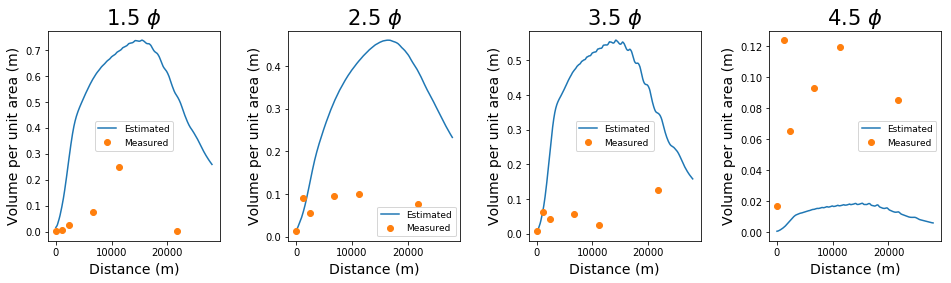

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

#基本設定
dist_offset = 5000.
dist_max = 28000.
gclass = 4
gclass_name = ['1.5phi','2.5phi','3.5phi','4.5phi']
#gclass_name = ['500micron', '125micron', '63micron']
gname_tex = ['1.5 $\phi$','2.5 $\phi$','3.5 $\phi$','4.5 $\phi$']
#gname_tex = ['500 $\mu$m','125 $\mu$m','63 $\mu$m']
calcdir = '/home/naruse/Documents/Documents/MATLAB/TCtrainData_forML/TCModel_for_MLTEST/otadai_no5_03/'
#calcdir = '/home/naruse/Documents/Documents/MATLAB/TCtrainData_forML/TCModel_for_MLTEST/test_output_otadai07/'

#推定値の読み込み
H1 = np.loadtxt(calcdir + 'H1.txt',delimiter=',')
H2 = np.loadtxt(calcdir + 'H2.txt',delimiter=',')
H3 = np.loadtxt(calcdir + 'H3.txt',delimiter=',')
H4 = np.loadtxt(calcdir + 'H4.txt',delimiter=',')
Ht = np.loadtxt(calcdir + 'Ht.txt',delimiter=',')
U = np.loadtxt(calcdir + 'U.txt',delimiter=',')
xi = np.loadtxt(calcdir + 'xi.txt',delimiter=',')
x = np.loadtxt(calcdir + 'x.txt',delimiter=',')
x_bed = np.loadtxt(calcdir + 'x_init.txt',delimiter=',')
eta_init = np.loadtxt(calcdir + 'eta_init.txt',delimiter=',')
Ct = np.loadtxt(calcdir + 'Ct.txt',delimiter=',')
time = np.loadtxt(calcdir + 'time.txt',delimiter=',')


#読み込んだデータの整形
estimated_dep = pd.DataFrame(np.array([x_bed - dist_offset,H1[-1,:],H2[-1,:],H3[-1,:],H4[-1,:]]).T,columns=['distance','1.5phi','2.5phi','3.5phi','4.5phi'])
#estimated_dep = pd.DataFrame(np.array([x_bed - dist_offset,H1[-1,:],H2[-1,:],H3[-1,:]]).T,columns=['distance','500micron','125micron','63micron'])
estimated_dep = estimated_dep.query('distance > 0')
estimated_dep = estimated_dep.query('distance < {}'.format(dist_max))

#元のデータの読み込み
outcrop = pd.read_csv('../DeepLearningTurbidite_Fukuda/otadai_no5.csv')
#outcrop = pd.read_csv('../DeepLearningTurbidite_Fukuda/GA_naruse_v2.csv')
#outcrop = outcrop.append(pd.DataFrame([[0,'Loc0',0,0,0],[dist_max,'LocE',0,0,0]], columns=outcrop.columns))
#outcrop = outcrop.sort_values('distance')
outcrop['distance'] = outcrop['distance'] - 6000

#作図
plt.figure(num=None, figsize=(16, 4), facecolor='w', edgecolor='g')
hfont = {'fontname':'Sans'}
plt.subplots_adjust(bottom=0.15, wspace=0.4)

for i in range(gclass):
    plt.subplot(1,gclass,i+1)
    plt.plot(estimated_dep['distance'],estimated_dep[gclass_name[i]],'-', label='Estimated')
    plt.plot(outcrop['distance'], outcrop[gclass_name[i]],'o', label='Measured')
    plt.title(gname_tex[i], size=21,**hfont)
    plt.xlabel('Distance (m)', size = 14, **hfont)
    plt.ylabel('Volume per unit area (m)', size = 14, **hfont)
    plt.legend(fontsize=9)

plt.show()


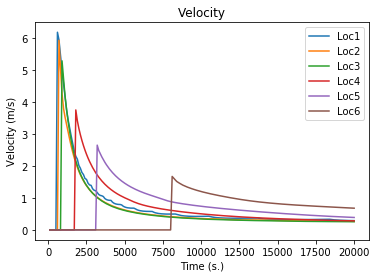

/home/naruse/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  warnings.warn(message, mplDeprecation, stacklevel=1)


 ...]

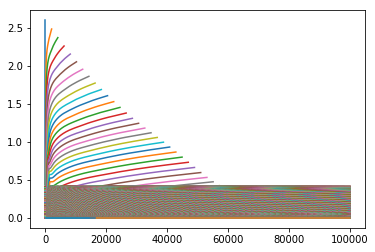

In [3]:
from scipy.interpolate import interp1d 
import ipdb

#ipdb.set_trace()

#各露頭における流速の時間変化を描く
endtime = 20000
delta_t = 100
et = int(endtime / delta_t)
offset = 5000

#補間によって時刻ごとの各露頭地点での流速を求める
U_loc = np.zeros([len(time),len(outcrop['distance'])])
for j in range(len(time)):
    f = interp1d(x[j,:]-offset,U[j,:], kind="linear", bounds_error=False, fill_value=0) #j番目の流速の補間関数
    U_loc[j,:] = f(outcrop['distance'])

#図にプロットする
fig = plt.figure()
for k in range(len(outcrop['distance'])):
    plt.plot(time[:et], U_loc[:et,k], label=outcrop['Loc'][k])
plt.legend()
plt.xlabel('Time (s.)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity')
plt.show()

#層厚分布をプロットする
plt.figure()
plt.plot(x, Ht)

In [ ]:
import matplotlib.animation as animation
%matplotlib

#パラメーター設定
topodx = 5.
deltat= 100.
start_loc = 500.
end_loc = 80000.
start_grid = int(start_loc)
end_grid = int(end_loc/topodx)
etime = H1.shape[0]

fig = plt.figure()
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312,sharex=ax1)
ax3 = fig.add_subplot(313,sharex=ax1)


ims = []

ax1.plot(x_bed[start_grid:end_grid],eta_init[start_grid:end_grid],'k-')
#ax1.set_title('Flow Height')
#ax2.set_title('Total Concentration')
#ax1.set_xlabel('Distance (m)')
ax1.set_ylabel('Elevation (m)')
ax2.set_ylabel('Concentration (%)')
ax3.set_ylabel('Vol. per unit area (m)')
ax3.set_xlabel('Distance (m)')

#アニメーションの作成
flag_legend = True
for i in range(etime):
    im0 = [ax1.text(0, 200, '$t=${0:.0f}'.format(time[i]))]
    im1 = ax1.plot(x[i,:],xi[i,:],'g-',label='Flow Height')
    im2 = ax2.plot(x[i,:],Ct[i,:]*100,'y-', label='Total Concentration')
    im3 = ax3.plot(x_bed[start_grid:end_grid],H1[i,start_grid:end_grid],'r-', label='500 $\\mu m$')
    im4 = ax3.plot(x_bed[start_grid:end_grid],H2[i,start_grid:end_grid],'c-', label='125 $\\mu m$')
    im5 = ax3.plot(x_bed[start_grid:end_grid],H3[i,start_grid:end_grid],'b-', label='63 $\\mu m$')
    im6 = ax3.plot(x_bed[start_grid:end_grid],Ht[i,start_grid:end_grid],'m-', label='Total thickness')
    if flag_legend:#一回のみ凡例を描画
        ax1.legend(frameon=False)
        ax2.legend(frameon=False)
        ax3.legend(frameon=False)
        flag_legend = False
    ims.append(im0 + im1+im2+im3+im4+im5+im6)

ani = animation.ArtistAnimation(fig, ims, interval=100)

#アニメーションの保存と表示
#ani.save('anim.gif', writer='imagemagick', fps=4)
ani.save('anim.mp4', writer='ffmpeg', fps=20,bitrate=10000)
plt.show()


Using matplotlib backend: Qt5Agg


# 柱状図を作成するスクリプト

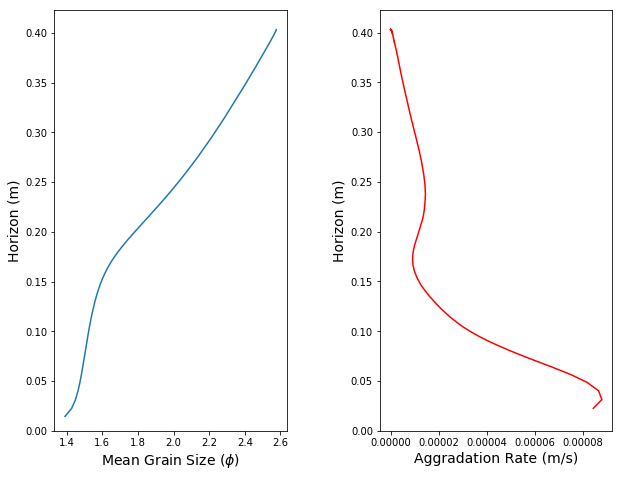

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipdb


#基本設定
dist_offset = 5000.
dist_max = 28000.
gclass = 3
#gclass_name = ['1.5phi','2.5phi','3.5phi','4.5phi']
gclass_name = ['500micron', '125micron', '63micron']
#gname_tex = ['1.5 $\phi$','2.5 $\phi$','3.5 $\phi$','4.5 $\phi$']
gname_tex = ['500 $\mu$m','125 $\mu$m','63 $\mu$m']
#calcdir = 'Z:/Documents/MATLAB/TCtrainData_forML/TCModel_for_MLTEST/otadai_no5_02/'
calcdir = '/home/naruse/Documents/Documents/MATLAB/TCtrainData_forML/TCModel_for_MLTEST/test_output_otadai07/'

#推定値の読み込み
if "H1" not in locals (): H1 = np.loadtxt(calcdir + 'H1.txt',delimiter=',')
if "H2" not in locals (): H2 = np.loadtxt(calcdir + 'H2.txt',delimiter=',')
if "H3" not in locals (): H3 = np.loadtxt(calcdir + 'H3.txt',delimiter=',')
#if "H4" not in locals (): H4 = np.loadtxt(calcdir + 'H4.txt',delimiter=',')
if "Ht" not in locals (): Ht = np.loadtxt(calcdir + 'Ht.txt',delimiter=',')
if "U" not in locals (): U = np.loadtxt(calcdir + 'U.txt',delimiter=',')
if "xi" not in locals (): xi = np.loadtxt(calcdir + 'xi.txt',delimiter=',')
if "x" not in locals (): x = np.loadtxt(calcdir + 'x.txt',delimiter=',')
if "x_bed" not in locals (): x_bed = np.loadtxt(calcdir + 'x_init.txt',delimiter=',')
if "eta_init" not in locals (): eta_init = np.loadtxt(calcdir + 'eta_init.txt',delimiter=',')
if "Ct" not in locals (): Ct = np.loadtxt(calcdir + 'Ct.txt',delimiter=',')
if "time" not in locals (): time = np.loadtxt(calcdir + 'time.txt',delimiter=',')
    
#基本設定
topodx = 5
loc = 17249
loc_id = round(loc / topodx)
gclass = 3
gclass_phi = [1.0, 3.0, 4.0]
vid = np.array(np.where(Ht[:,loc_id] > 0.01)).T #まだ堆積が起こっていない領域の平均粒径は計算できないため

#柱状図に必要な数値の産出
mean_gsize = (H1[vid,loc_id] * gclass_phi[0] + H2[vid,loc_id] * gclass_phi[1] + H3[vid,loc_id] * gclass_phi[2])/Ht[vid,loc_id]
sed_vel = ((Ht[vid[2:], loc_id] - Ht[vid[:-2],loc_id]) / (time[vid[2:]] - time[vid[:-2]]))
#ipdb.set_trace()

#柱状図の描画
plt.figure(num=None, figsize=(10, 8), facecolor='w', edgecolor='g')
hfont = {'fontname':'Sans'}
textcol='k'
plt.subplots_adjust(bottom=0.15, wspace=0.4)

plt.subplot(1,2,1)
plt.plot(mean_gsize,Ht[vid,loc_id])
plt.xlabel("Mean Grain Size ($\phi$)",color=textcol,size=14,**hfont)
plt.ylabel("Horizon (m)",color=textcol,size=14,**hfont)
plt.ylim(0,)

plt.subplot(1,2,2)
plt.plot(sed_vel, Ht[vid[1:-1],loc_id],'r')
plt.ylim(0,)
plt.xlabel("Aggradation Rate (m/s)",color=textcol,size=14,**hfont)
plt.ylabel("Horizon (m)",color=textcol,size=14,**hfont)
plt.savefig("column.svg")
plt.show()

    


# 作業メモ


### 2017/8/18
- 斜面も変数とした6変数のフォワードモデルを用いてトレーニングデータ（サンプルサイズ1000）を作り，実験をした

- validation split = 0.2

- Adadelta, Adam, SGD（学習率0.02, momentum 0.9, nesterovあり）では，バッチサイズに関わらずSGDが最も成績が良い（ただしエポック数10）

- バッチサイズは4, 8, 16, 32, 64を試したところ，8が最も成績が良い（ただしエポック数10）

- SGD, バッチサイズ16でエポック数300にしたところ，過学習がみられた．

- Dropout(0.5) を隠しレイヤーに入れてみると，不連続にmseが減少した．

    - エポック数10の時は過学習は見られない

    - エポック数500で実験を行うと，mse=0.3程度から全く学習が進まなくなった（エポック数15で打ち切り）

    - バッチサイズ16にしてやり直し→Epoch11あたりから急激に学習が進む（0.3から0.07へ）

    - Dropoutを入れると過学習は避けられているが学習の進行が遅く，しかも断続的に進む

    - 最終的にmseは0.0236となった．overfittingは全くないものの，あまり成績が良くない

- SGD, バッチサイズ8，Dropoutなしで500エポックをやってみる．→mse0.007だが過学習（トレーニングデータでは6.03e-04）

### 2017/8/19
- SGD, バッチサイズ8，Dropout（0.5）を一つ目の隠し層だけに入れてみる．→mse0.0123でやや過学習（トレーニングデータでは0.0060）
- この後やるべきこと
    - 誤差の計算
    - 復元された値で数値計算をしてみて，真値からどのくらい流速などの条件がずれているのか3地点程度でチェックする
    - 入力値にノイズを加えてみて，結果のロバストさを調べる
    - 補外はどの程度できるのかチェックする
    - トレーニングデータの量はどの程度が適切なのか→トレーニングデータを5000くらい生成してみること
    
### 2017/8/20
- Adam, バッチサイズ8，Dropout（0.5）を一つ目と二つ目の隠し層にいれてみて，1000エポック計算してみる→mse0.0112程度．過学習はほとんどない．

### 2017/8/22
- トレーニングデータを増やしてみる．1500×4で6000個のデータを作成する．計算条件：計算終了は20000秒，流れの初期高さ100-800，初期長さ100-800，濃度は3粒径（500, 125, 63 micron）それぞれ1-0.01%，勾配は0-0.5%

### 2017/9/1
- 現状でベストな設定：
	- SGD, lr=0.02, momentum=0.9, nesterov=True
	- metrics=["mean_squared_error"]
	- batch_size = 8
	- epoch = 1000
- ニューラルネットワークの構造
	- 入力層21000→隠し層（1）3200→隠し層（2）1000→隠し層（3）200→隠し層（4）50→出力層6
	- 活性化関数はすべてReLU
- 今日の実験：ネットワークの層数を変えてみる（epoch数10で実験）
	- そのまま→mse0.03156
	- 隠し層（1）を消す→mse0.0309
		- 隠し層（1）がない方が成績が良い！勾配消失？
	- 隠し層（２）を消す→0.0318
		- 若干成績が落ちるが，それほど変わりはない
	- 隠し層（３）を消す→0.0318
		- 若干成績が落ちるが，それほど変わりはない

### 2017/9/14
- GPU（GeForce GTX 1050 Ti）をインストール
- tensorflow-gpu0.12をインストール(CUDA8.0&cuDNN6.0)
- 速度が十倍以上に向上し，CPUはほぼフリー！
- ちょっと実験：ネットワークの総数を変えてみる（epoch数10で実験）
	- 隠し層（2）と（３）を消してみる→0.0489
		- 成績が大幅に落ちた．どうやら隠し層は３つ必要らしい
- 新規ニューラルネットワークの構造
	- 入力層21000-Dropout(0.5)→隠し層（１）1000→隠し層（２）200→隠し層（３）50→出力層6
		- そのまま→mse0.035
		- Dropout(0.5)を消してみると，0.035, 0.028, 0.028でoverfittingなしのときもあるがoverfitting気味の時もある
		- 隠し層（１）にDropout(0.5)を入れてみると，0.035, 0.0365でoverfittingなし
- 地質学会向け暫定版NNの構造を以下の通りとする
	- 入力層21000→隠し層（１）1000-Dropout(0.5)→隠し層（２）200→隠し層（３）50→出力層6
	- epoch数300で実行→mse0.005程度
	- SGD（学習率0.02, momentum 0.9, nesterovあり）でバッチ数16にしたところ，結果が向上した
	- トレーニングデータ数を1000，2000，3000，4000，4500と変化させたところ，1000から3000ではmseに大きな向上が見られたが，それ以降はあまり変化が無い
	- 今のところ0.005程度が最高記録（データ数4500の場合）

### 2018/1/17
- トレーニングデータを作り直した（現在計算中）．
    - 計算終了時刻を100000秒（約28時間）として，計算ドメインの大きさを100 kmにしたので，一応すべての堆積物が落ちるはず．
- 現状でそろったデータ数1200にてテスト中
- 改良点
    - レイヤー数を5層-8層で変化させて検討中（5層が今のところベスト）
     -ユニット数は2000で統一（おそらく冗長だが気にしない）
    - SGD(learning rate 0.03, decay rate 0.4e-04, momentum 0.9, nesterovあり）バッチ数16が今のところベスト
    - kernel initializerをgrolot_uniformに変更したところ，結果が劇的に向上した．
    - Drop outは最初の隠しレイヤーに0.5で入れている．他のレイヤーに入れると学習が進まない．

### 2018/1/18
- 昨日に引き続き検討中．
- レイヤー数は5層がベスト
- drop out（0.5）は最後のレイヤーを除くすべてのレイヤーへ入れると過学習が起こらない．
- SGDの(learning rate 0.03, decay rate 0.4e-04）とSGD(learning rate 0.02, decay rate 0）はほとんど互角
- Epochを500から1000にしてみようかな．
- 今のところmseのベストは0.0161

### 2018/1/19
- 昨日に引き続き検討中
- Adadeltaはまあまあ（0.021)．Adamは全然ダメ．
- Adamのlearning rateを変えてみる．⇒全然ダメ
- SGD(learning rate 0.03, decay rate 0.4e-04）でepoch1000にしたところ，最高記録を達成（0.0138）．このあたりが限界か？
- SGD(learning rate 0.02, decay rate 0）でepoch1000にしてみよう．最高記録を達成（0.0120）．
- SGD(learning rate 0.02, decay rate 0）でepoch2000にしてみよう．最高記録を達成（0.009986)．
- SGD(learning rate 0.02, decay rate 0) batch 8でepoch2000⇒いまいち（0.066)．
- SGD(learning rate 0.03, decay rate 1.0e-05) batch16でepoch2000→ほぼ最高記録と同等（0.0107）．ここが限界だろう．

### 2018/1/24
- SGD(learning rate 0.03, decay rate 1.0e-05) batch32でepoch2000→最高記録（0.00957）．まだいけるかもしれない．
- SGD(learning rate 0.02, decay rate 0) batch32でepoch2000→最高記録とほぼ同等（0.00972）．まだいけるかもしれない．
- SGD(learning rate 0.02, decay rate 0) batch64でepoch2000→最高記録とほぼ同等（0.00985）．このあたりが限界かな．

### 2018/1/25
- レイヤーを一つ増やしてみた（隠しレイヤーが６つ）．SGD(learning rate 0.02, decay rate 0) batch32でepoch2000→最高記録とほぼ同等（0.00985）．つまり特に向上は見られない．
- レイヤーを一つ減らしてみた（隠しレイヤーが４つ）．SGD(learning rate 0.02, decay rate 0) batch32でepoch2000→最高記録達成！（0.00827）
- さらにレイヤーを一つ減らす（隠しレイヤーが３つ）．SGD(learning rate 0.02, decay rate 0) batch32でepoch2000→0.00939．ちょっと成績がさがった．隠しレイヤーは4つがベストらしい．
- 隠しレイヤー4つでSGD(learning rate 0.03, decay rate 1.0e-05) batch32，epoch2000→0.00860．ほぼ最高記録と同等だが，learning rateはどうやら固定した方がいいらしい．
- 隠しレイヤー4つでadadeltaを試してみる．batch32，epoch2000→0.0118．大してよくない．トレーニングデータでは0.0066なので，完全にオーバーフィッティング

### 2018/1/29
- 隠しレイヤー４つ．SGD(learning rate 0.02, decay rate 0) batch32でepoch2000→0.00848．やはりこの設定がコンスタントに成績が良い．
- 残渣をチェック．
    - 残渣の平均値
[ -7.63810426e+00  -1.88151649e+01  -4.36880991e-04  -2.40537440e-04
  -6.26971886e-04   1.29950743e-04]
    - 残渣の2σ
[  5.58839758e+01   7.95840009e+01   1.22758221e-03   1.33981768e-03
   1.85698892e-03   6.17234839e-04]
    - シャピロ・ウィルク検定のp値は以下の通り→$S_l$以外は正規分布とは言えない．→ノンパラメトリックな誤差推定が必要．

|variable|p|
|---|---|
|$l_0$|0.0022262868005782366|
|$H_0$|3.0351007808349095e-05|
|$C_1$|0.0265838373452425|
|$C_2$|0.01678871177136898|
|$C_3$|7.528178684879094e-06|
|$S_l$|0.30633744597435|

- 計測値に誤差を加えた場合のシミュレーションを行った．正規乱数を発生させ，2σが計測値のe%になるようにスケーリングして計測値に足し合わせた．その結果，逆解析が極めてロバストであることが証明された．e=100%で誤差を加えても，ほとんど影響は見られない．500%くらいでようやく大きな誤差がみられるようになる．素晴らしい！
- リサンプリングでは，1%以下になると急激に成績が悪化する．1 km程度の頻度でデータが必要．

### 2018/2/19
- 大田代層への適用．
    - >2.5 phi = 500 $\mu$m, 2.5--3.5 phi = 125 $\mu$m, <3.5 phi = 63 $\mu$m として計算．含泥率も考慮（=63 $\mu$mとみなした）
    - 東日傘層の分布東端を海底谷末端と解釈して，そこからの各露頭の距離をx座標値として用いた．
    - 粒度分布を鉛直平均し，層厚をかけて，粒径別面積当たり堆積量を計算した．
    - 露頭間のデータ・計測区間外の対応
        -線型補間・補外（0と7000 m地点で厚さゼロ）
    - 結果：3.56160629e+02   3.51775348e+02   4.42300827e-03   4.75855211e-03    6.28440559e-03   1.19929761e-04
        - 何となくそれっぽいかな？
    - 先ほどは計算間違い（dx = 5 mのところ10 mとして計算していました）．ただしくは下記の通り：
        - $l_0$: 4.42753816e+02, $H_0$: 4.68304175e+02, $C_1$: 1.21124697e-03, $C_2$: 4.10763268e-03, $C_3$: 5.36788050e-03, $S_l$: 3.21568817e-03
    - これはうまくいっていない．原因は，補外？→学習やり直しをやってみよう；補間？→Krigingを試してみよう；学習データの初期値範囲が悪い？→学習データの生成をやり直す必要がある

### 2018/2/20
- 昨日の続きで手法を大田代層へ適用
    - 古流向方向に投影することで露頭間の距離を決める
    - 補間方法をKrigingに変更
    - 結果：$l_0$: 4.51542318e+02, $H_0$: 4.64720690e+02, $C_1$: 6.80109105e-04, $C_2$: 3.61492358e-03, $C_3$: 4.47290092e-03, $S_l$:2.26792350e-03
- 間違えた！データをノーマライズするのを忘れてた．やり直し．
- 結果（線型補間）：$l_0$:3.70987403e+02, $H_0$:3.61791265e+02, $C_1$:1.13563218e-03, $C_2$:2.82871366e-03, $C_3$:  3.09152468e-03, $S_l$:5.43223023e-03
- 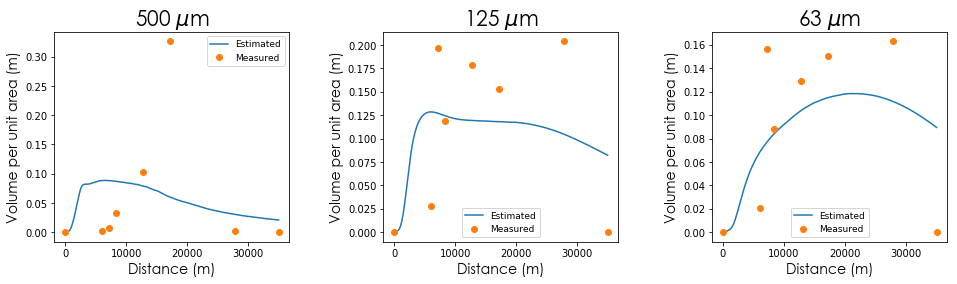
- クリギングでPowerモデルをつかった場合
- 結果（Kriging (power)）：3.68457890e+02   3.58259517e+02   1.28700369e-03   2.90782148e-03    3.12362566e-03   5.45903862e-03
- あまり変わらない．

### 2018/2/21
- 学習のやり直し．分析対象の最初の地点から最後の地点までの区間で学習データを抽出し，学習する．補外が必要なくなる．
- 昨日の復元パラメーターで数値計算をやってみる．どの程度適合するか．
- わかったこと：500 $\mu$m のピークは真っ当なやり方では再現できない．
    - 今のところ，0-22000の区間で逆解析すると，ピーク自体は再現できる（しかしデータは6005-27000の区間なのでインチキ）
        - このデータの計算結果はotadai06に保存されている．
    - 6005-27000のデータを0-22000にマップしても，0-27000にマップしても（上流は補外を使う），500 $\mu$mのピークは出てこない．おそらく，22000-27000区間の低い層厚の影響が出てしまうのだろう．
    - どうすれば？たぶん，中尾の3粒径区分が間違い．500, 125, 63では，極端に粗すぎる．天然のデータでは300 $\mu$m付近に多くの堆積物が含まれているのに，この粒度区分ではその粒径が500 $\mu$mの階級に丸められてしまう．

### 2018/2/26
- トレーニングデータ生成のやり直し．粒径区分を1.5phi, 2.5phi, 3.5phi, 4.5phiの4階級に切りなおした．計算時間を最大で120000秒とした．

### 2018/4/03
- 4階級のトレーニングデータで学習のやり直し．データ数は1728個．世代数を4000にした．計算時間は5時間ぐらい．

### 2018/4/5
- トレーニングデータの交叉検証ではval_loss: 0.0067なのに，選り分けておいたテストデータではloss: 0.016なのはなぜか．独立データでは誤差が3倍になってしまう．過学習？しかし，トレーニングデータ内の交叉検証では問題がないのだが．
- テストデータを200に増やしてみよう．

# To do list

- 誤差の計算
    - Jackknife法による誤差の検定

- 現実のデータへの適用
    - 計測区間外の扱いをどうするか．
        - 補外？計測区間だけを学習したNNをつくるか？

- 復元された値で数値計算をしてみて，真値からどのくらい流速などの条件がずれているのか露頭計測地点でチェック
    - 各地点での流速の時間変化（作成済み）＋濃度の時間変化（これから）＋堆積速度の時間変化
    - 各地点での粒度分布に入力値の粒度分布を重ねる
    - 各地点での柱状図（平均粒径の垂直変化）＋入力値の柱状図＋流速変化＋濃度変化

- トレーニングデータの量はどの程度が適切なのか→トレーニングデータを5000くらい生成してみること

- Forward Modelに濃度補正を入れる？4eqにする？＋bedloadを入れる
